## NLP Assigment: Spam detection 

In [1]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("data/emails.csv")
df.shape

(5172, 3002)

In [3]:
print(df.head(5))
print(df.info())

  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries

29.00%


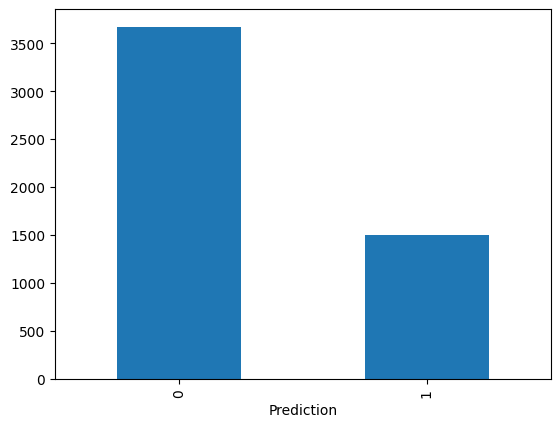

In [4]:
df['Prediction'].value_counts().plot.bar()
print(f"{(len(df[df['Prediction'] == 1]) / len(df['Prediction'])) * 100:.2f}%")

In [5]:
# La funzione spamDetector è progettata per classificare messaggi come spam o non spam utilizzando 
# il modello Naive Bayes Multinomial. 

def spamDetector(X,y):
    """ciao"""
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    model = MultinomialNB()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    return cm



##### Multinomial Naive Bayes with All Features
I evaluate the performance of a Multinomial Naive Bayes classifier using all the features available in the dataset.

In [6]:
X = df.drop(columns=['Email No.','Prediction'])
y = df['Prediction']

cm1 = spamDetector(X,y)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       735
           1       0.87      0.94      0.90       300

    accuracy                           0.94      1035
   macro avg       0.92      0.94      0.93      1035
weighted avg       0.94      0.94      0.94      1035



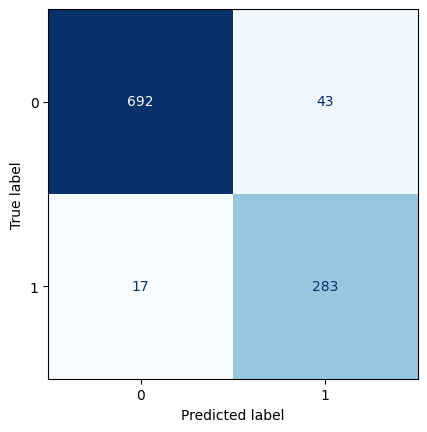

In [7]:
ConfusionMatrixDisplay(cm1, display_labels=[0, 1]).plot(cmap='Blues', colorbar=False)

plt.show()

##### Multinomial Naive Bayes without stopwords
I evaluate the performance of a Multinomial Naive Bayes classifier without .

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rikyf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
df = pd.read_csv("data/emails.csv")

In [10]:
stop_words = set(stopwords.words('english'))
drop_f = []
for feature in df.columns:
    if feature in stop_words:
        drop_f.append(feature)
print(drop_f)

['the', 'to', 'and', 'for', 'of', 'a', 'you', 'in', 'on', 'is', 'this', 'i', 'be', 'that', 'will', 'have', 'with', 'your', 'at', 'we', 's', 'are', 'it', 'by', 'as', 'from', 'or', 'not', 'me', 'if', 're', 'any', 'our', 'can', 'd', 'all', 'has', 'was', 'an', 't', 'up', 'should', 'do', 'am', 'out', 'no', 'there', 'but', 'been', 'these', 'so', 'm', 'into', 'they', 'my', 'what', 'only', 'which', 'more', 'about', 'now', 'their', 'some', 'just', 'other', 'here', 'when', 'over', 'them', 'below', 'o', 'he', 'were', 'who', 'don', 'its', 'through', 'had', 'she', 'how', 'being', 'under', 'than', 'off', 'after', 'each', 'll', 'did', 'before', 'then', 'his', 'same', 'does', 'above', 'those', 'down', 'very', 'her', 'such', 'again', 'both', 've', 'until', 'because', 'where', 'further', 'most', 'between', 'own', 'once', 'while', 'during', 'why', 'him', 'few', 'y', 'too', 'having', 'doing', 'didn', 'yourself', 'doesn', 'won', 'against', 'nor', 'myself', 'isn', 'haven', 'whom', 'couldn', 'wasn', 'itself'

In [11]:
df_filtered = df.drop(drop_f, axis=1)
df_filtered

,Email No.,ect,hou,enron,com,gas,deal,meter,hpl,please,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,24,27,1,3,1,0,0,0,2,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,1,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,22,10,0,0,0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,17,9,0,0,2,0,3,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,11,3,1,3,5,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,1,0,0,4,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1


In [12]:
X = df_filtered.drop(columns=['Email No.','Prediction'])
y = df_filtered['Prediction']

cm2 = spamDetector(X,y)

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       735
           1       0.87      0.94      0.90       300

    accuracy                           0.94      1035
   macro avg       0.92      0.94      0.93      1035
weighted avg       0.94      0.94      0.94      1035



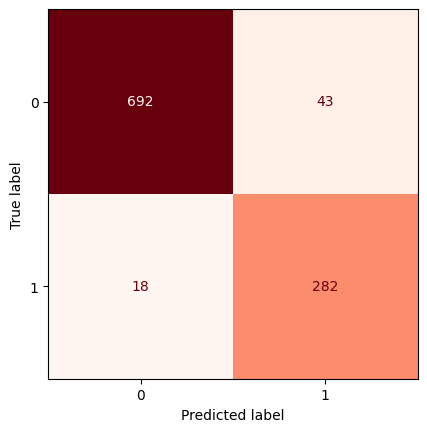

In [13]:
ConfusionMatrixDisplay(cm2, display_labels=[0, 1]).plot(cmap='Reds', colorbar=False)

plt.show()

### Determination of the field Provenance
The goal is to group emails based on their content to determine provenance.


In [14]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_matrix = cosine_similarity(X,X)

c:\Python39\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Impossibile trovare il file specificato
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Python39\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Python39\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Python39\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Python39\lib\subprocess.py", line 1420, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


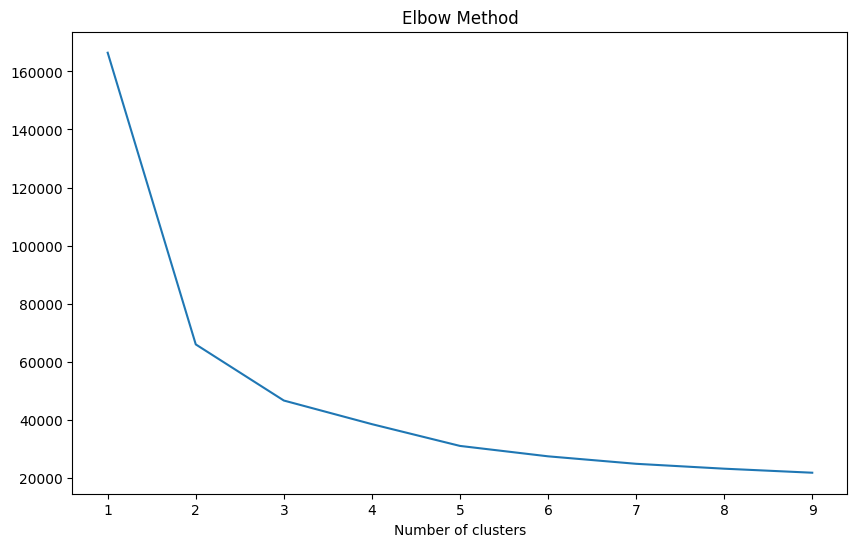

In [15]:
from sklearn.cluster import KMeans
cs = []
plt.figure(figsize=(10,6))
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(cosine_matrix)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 10), cs)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.show()

In [47]:
kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(cosine_matrix)
clusters=kmeans.labels_
df2 = df.copy()
df2['Provenance'] = clusters

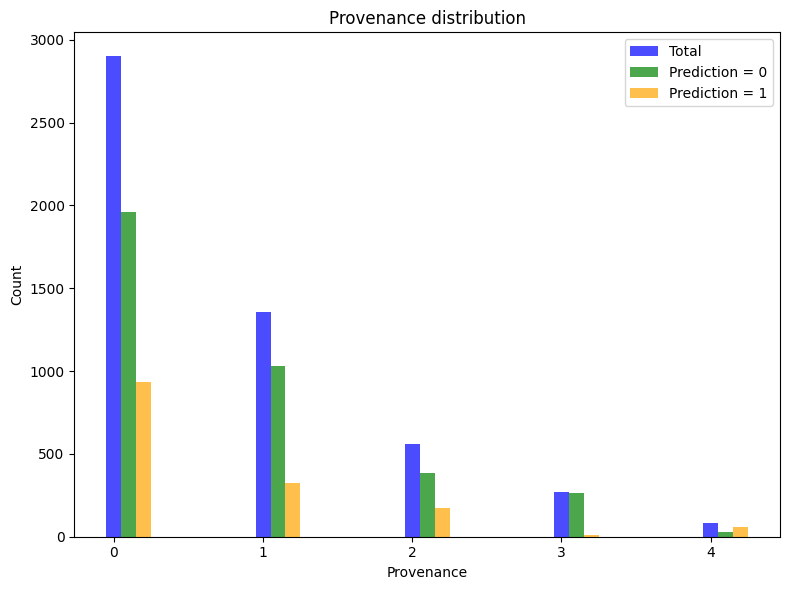

In [48]:
import matplotlib.pyplot as plt
import numpy as np

total_counts = df2['Provenance'].value_counts()
no_spam_counts = df2[df2['Prediction'] == 0]['Provenance'].value_counts()
spam_counts = df2[df2['Prediction'] == 1]['Provenance'].value_counts()


categories = total_counts.index
indices = np.arange(len(categories))

bar_width = 0.1

plt.figure(figsize=(8, 6))

plt.bar(indices, total_counts[categories], width=bar_width, color='blue', alpha=0.7, label='Total')

plt.bar(indices + bar_width, no_spam_counts.reindex(categories, fill_value=0), width=bar_width, color='green', alpha=0.7, label='Prediction = 0')

plt.bar(indices + 2 * bar_width, spam_counts.reindex(categories, fill_value=0), width=bar_width, color='orange', alpha=0.7, label='Prediction = 1')


plt.title("Provenance distribution")
plt.xlabel("Provenance")
plt.ylabel("Count")
plt.xticks(categories)
plt.legend()
plt.tight_layout()

plt.show()

In [36]:
X2 = df2.drop(['Email No.', 'Prediction'], axis = 1)
y2 = df2['Prediction']

In [37]:
cm3 = spamDetector(X2,y2)

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       735
           1       0.87      0.93      0.90       300

    accuracy                           0.94      1035
   macro avg       0.92      0.94      0.93      1035
weighted avg       0.94      0.94      0.94      1035



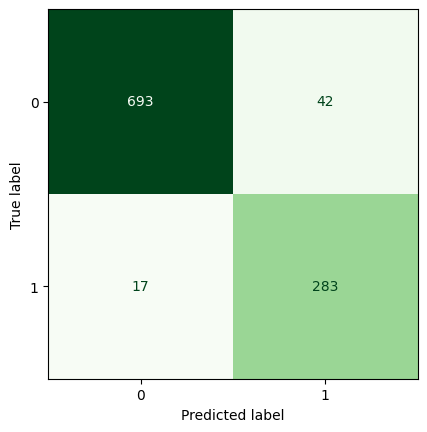

In [26]:
ConfusionMatrixDisplay(cm3, display_labels=[0, 1]).plot(cmap='Greens', colorbar=False)
plt.show()

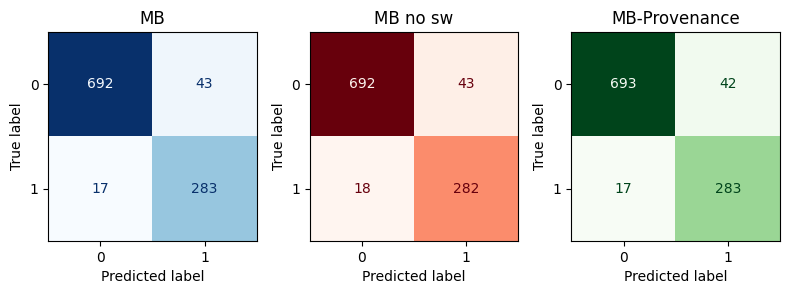

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(8, 4))

ConfusionMatrixDisplay(cm1).plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title("MB")

ConfusionMatrixDisplay(cm2).plot(ax=axes[1], cmap='Reds', colorbar=False)
axes[1].set_title("MB no sw")

ConfusionMatrixDisplay(cm3).plot(ax=axes[2], cmap='Greens', colorbar=False)
axes[2].set_title("MB-Provenance")

plt.tight_layout()
plt.show()